In [1]:
import tensorflow as tf
import numpy as np

2023-11-14 13:50:11.274385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 13:50:11.417197: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 13:50:11.418795: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 13:50:13.872737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [9]:
print(celsius)

[-40. -10.   0.   8.  15.  22.  38.]


In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [10]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


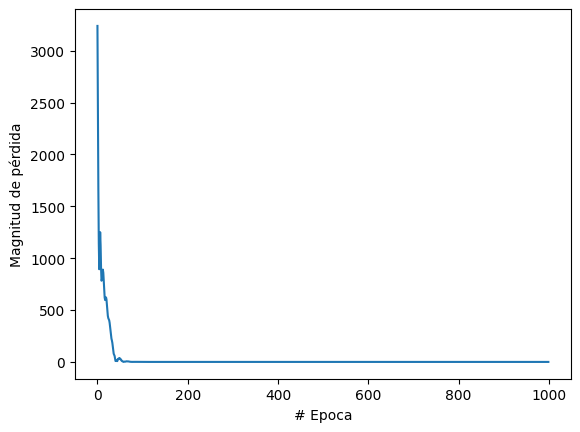

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 99ms/step
El resultado es [[211.7475]] fahrenheit!


In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.7593857 , -0.12271895, -0.35797843]], dtype=float32), array([ 4.2457323, -3.6905189,  0.8880914], dtype=float32)]
[array([[-1.4343519 , -0.25675663, -0.6675049 ],
       [ 0.82258296,  0.3575612 ,  0.37396625],
       [ 0.04076123, -0.50751895, -1.310683  ]], dtype=float32), array([-4.217585 , -3.861665 , -1.3687096], dtype=float32)]
[array([[-1.4139792 ],
       [-0.7625317 ],
       [-0.60819995]], dtype=float32), array([3.9074135], dtype=float32)]
